This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Fundamentals of machine learning

## Generalization: The goal of machine learning

### Underfitting and overfitting

#### Noisy training data

#### Ambiguous features

#### Rare features and spurious correlations

**Adding white-noise channels or all-zeros channels to MNIST**

In [2]:
from tensorflow.keras.datasets import mnist
import numpy as np

(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

train_images_with_noise_channels = np.concatenate(
    [train_images, np.random.random((len(train_images), 784))], axis=1)

train_images_with_zeros_channels = np.concatenate(
    [train_images, np.zeros((len(train_images), 784))], axis=1)

**Training the same model on MNIST data with noise channels or all-zero channels**

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

def get_model():
    model = keras.Sequential([
        layers.Dense(512, activation="relu"),
        layers.Dense(10, activation="softmax")
    ])
    model.compile(optimizer="rmsprop",
                  loss="sparse_categorical_crossentropy",
                  metrics=["accuracy"])
    return model

model = get_model()
history_noise = model.fit(
    train_images_with_noise_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

model = get_model()
history_zeros = model.fit(
    train_images_with_zeros_channels, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 7s 4ms/step - loss: 0.6038 - accuracy: 0.8148 - val_loss: 0.2620 - val_accuracy: 0.9224
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.2583 - accuracy: 0.9203 - val_loss: 0.2032 - val_accuracy: 0.9413
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1679 - accuracy: 0.9479 - val_loss: 0.1640 - val_accuracy: 0.9503
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1180 - accuracy: 0.9630 - val_loss: 0.1554 - val_accuracy: 0.9538
Epoch 5/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0880 - accuracy: 0.9720 - val_loss: 0.1472 - val_accuracy: 0.9544
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0648 - accuracy: 0.9804 - val_loss: 0.2045 - val_accuracy: 0.9395
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0461 - accuracy: 0.9854 - val_loss: 0.1204 - val_accuracy: 0.9667
Epoch 

In [4]:
model = get_model()
history_original = model.fit(
    train_images, train_labels,
    epochs=10,
    batch_size=128,
    validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2992 - accuracy: 0.9137 - val_loss: 0.1723 - val_accuracy: 0.9485
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 0.1226 - accuracy: 0.9643 - val_loss: 0.1132 - val_accuracy: 0.9678
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0801 - accuracy: 0.9762 - val_loss: 0.0898 - val_accuracy: 0.9729
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0577 - accuracy: 0.9829 - val_loss: 0.0816 - val_accuracy: 0.9766
Epoch 5/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0421 - accuracy: 0.9875 - val_loss: 0.0753 - val_accuracy: 0.9778
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0326 - accuracy: 0.9907 - val_loss: 0.0692 - val_accuracy: 0.9789
Epoch 7/10
375/375 [==============================] - 2s 5ms/step - loss: 0.0236 - accuracy: 0.9933 - val_loss: 0.0782 - val_accuracy: 0.9782
Epoch 

**Plotting a validation accuracy comparison**

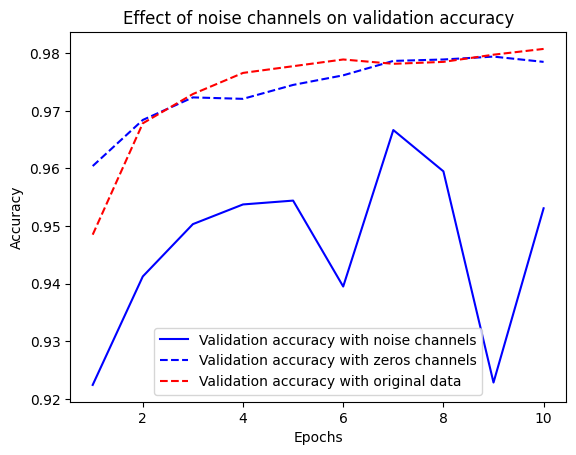

In [5]:
import matplotlib.pyplot as plt
val_acc_noise = history_noise.history["val_accuracy"]
val_acc_zeros = history_zeros.history["val_accuracy"]
val_acc_original = history_original.history["val_accuracy"]
epochs = range(1, 11)
plt.plot(epochs, val_acc_noise, "b-",
         label="Validation accuracy with noise channels")
plt.plot(epochs, val_acc_zeros, "b--",
         label="Validation accuracy with zeros channels")
plt.plot(epochs, val_acc_original, "r--", 
         label="Validation accuracy with original data")
plt.title("Effect of noise channels on validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

### The nature of generalization in deep learning

**Fitting a MNIST model with randomly shuffled labels**

In [6]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

history_model = model.fit(
    train_images, random_train_labels,
    epochs=100,
    batch_size=128,
    validation_split=0.2)

Epoch 1/100
375/375 [==============================] - 3s 5ms/step - loss: 2.3149 - accuracy: 0.1019 - val_loss: 2.3043 - val_accuracy: 0.1063
Epoch 2/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2990 - accuracy: 0.1183 - val_loss: 2.3099 - val_accuracy: 0.1027
Epoch 3/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2913 - accuracy: 0.1269 - val_loss: 2.3175 - val_accuracy: 0.0977
Epoch 4/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2789 - accuracy: 0.1397 - val_loss: 2.3251 - val_accuracy: 0.1031
Epoch 5/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2622 - accuracy: 0.1520 - val_loss: 2.3320 - val_accuracy: 0.1028
Epoch 6/100
375/375 [==============================] - 1s 3ms/step - loss: 2.2425 - accuracy: 0.1666 - val_loss: 2.3474 - val_accuracy: 0.1004
Epoch 7/100
375/375 [==============================] - 1s 4ms/step - loss: 2.2179 - accuracy: 0.1802 - val_loss: 2.3649 - val_accuracy: 0.1042

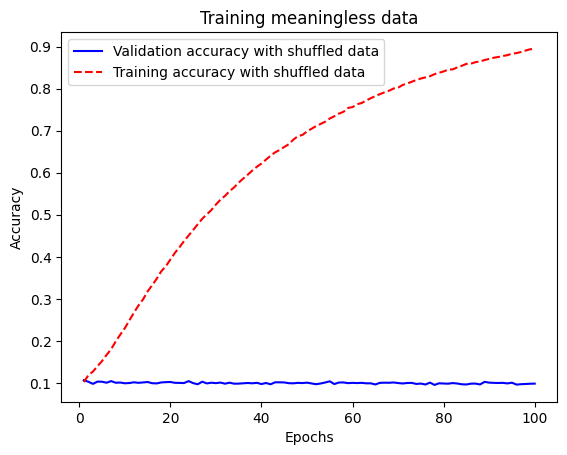

In [7]:
val_acc_shuffle = history_model.history["val_accuracy"]
train_acc_shuffle = history_model.history["accuracy"]

epochs = range(1, 101)
plt.plot(epochs, val_acc_shuffle, "b-",
         label="Validation accuracy with shuffled data")
plt.plot(epochs, train_acc_shuffle, "r--", 
         label="Training accuracy with shuffled data")
plt.title("Training meaningless data")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

#### The manifold hypothesis

#### Interpolation as a source of generalization

#### Why deep learning works

#### Training data is paramount

## Evaluating machine-learning models

### Training, validation, and test sets

#### Simple hold-out validation

#### K-fold validation

#### Iterated K-fold validation with shuffling

### Beating a common-sense baseline

### Things to keep in mind about model evaluation

## Improving model fit

### Tuning key gradient descent parameters

**Training a MNIST model with an incorrectly high learning rate**

In [8]:
(train_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28 * 28))
train_images = train_images.astype("float32") / 255

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1.),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 781.9617 - accuracy: 0.3134 - val_loss: 2.2259 - val_accuracy: 0.2764
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 3.0750 - accuracy: 0.2208 - val_loss: 2.2322 - val_accuracy: 0.2393
Epoch 3/10
375/375 [==============================] - 1s 4ms/step - loss: 2.6691 - accuracy: 0.2180 - val_loss: 7.1070 - val_accuracy: 0.1365
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 2.5366 - accuracy: 0.2044 - val_loss: 2.3047 - val_accuracy: 0.1671
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 2.5003 - accuracy: 0.1955 - val_loss: 2.2749 - val_accuracy: 0.1883
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 2.3789 - accuracy: 0.2143 - val_loss: 2.0919 - val_accuracy: 0.2267
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.4428 - accuracy: 0.2296 - val_loss: 2.0795 - val_accuracy: 0.2377
Epoc

**The same model with a more appropriate learning rate**

In [9]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer=keras.optimizers.RMSprop(1e-2),
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.fit(train_images, train_labels,
          epochs=10,
          batch_size=128,
          validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.3513 - accuracy: 0.9105 - val_loss: 0.1278 - val_accuracy: 0.9613
Epoch 2/10
375/375 [==============================] - 1s 4ms/step - loss: 0.1260 - accuracy: 0.9635 - val_loss: 0.1295 - val_accuracy: 0.9666
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0987 - accuracy: 0.9737 - val_loss: 0.1361 - val_accuracy: 0.9708
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0802 - accuracy: 0.9792 - val_loss: 0.1659 - val_accuracy: 0.9659
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 0.0689 - accuracy: 0.9822 - val_loss: 0.1855 - val_accuracy: 0.9606
Epoch 6/10
375/375 [==============================] - 1s 4ms/step - loss: 0.0596 - accuracy: 0.9858 - val_loss: 0.1741 - val_accuracy: 0.9718
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0528 - accuracy: 0.9875 - val_loss: 0.1770 - val_accuracy: 0.9738
Epoch 

### Leveraging better architecture priors

### Increasing model capacity

**A simple logistic regression on MNIST**

In [10]:
model = keras.Sequential([layers.Dense(10, activation="softmax")])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_small_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 2s 4ms/step - loss: 0.6743 - accuracy: 0.8324 - val_loss: 0.3622 - val_accuracy: 0.9042
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3532 - accuracy: 0.9036 - val_loss: 0.3096 - val_accuracy: 0.9147
Epoch 3/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3179 - accuracy: 0.9125 - val_loss: 0.2931 - val_accuracy: 0.9174
Epoch 4/20
375/375 [==============================] - 1s 3ms/step - loss: 0.3016 - accuracy: 0.9161 - val_loss: 0.2824 - val_accuracy: 0.9217
Epoch 5/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2921 - accuracy: 0.9184 - val_loss: 0.2778 - val_accuracy: 0.9242
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2854 - accuracy: 0.9205 - val_loss: 0.2755 - val_accuracy: 0.9243
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.2805 - accuracy: 0.9218 - val_loss: 0.2731 - val_accuracy: 0.9243
Epoch 

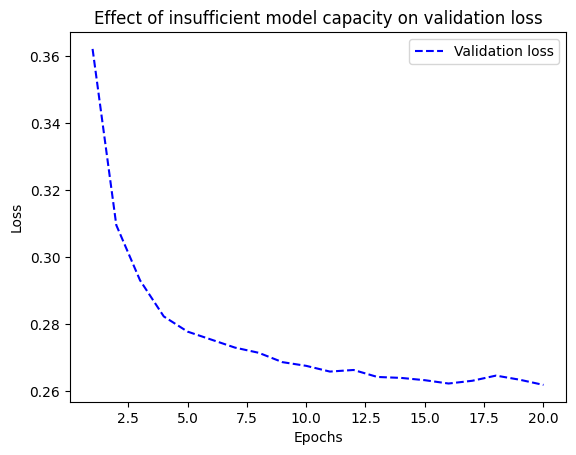

In [11]:
import matplotlib.pyplot as plt
val_loss = history_small_model.history["val_loss"]
epochs = range(1, 21)
plt.plot(epochs, val_loss, "b--",
         label="Validation loss")
plt.title("Effect of insufficient model capacity on validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

In [12]:
model = keras.Sequential([
    layers.Dense(96, activation="relu"),
    layers.Dense(96, activation="relu"),
    layers.Dense(10, activation="softmax"),
])
model.compile(optimizer="rmsprop",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
history_large_model = model.fit(
    train_images, train_labels,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
375/375 [==============================] - 3s 4ms/step - loss: 0.3545 - accuracy: 0.8992 - val_loss: 0.1775 - val_accuracy: 0.9500
Epoch 2/20
375/375 [==============================] - 1s 3ms/step - loss: 0.1585 - accuracy: 0.9529 - val_loss: 0.1436 - val_accuracy: 0.9572
Epoch 3/20
375/375 [==============================] - 1s 4ms/step - loss: 0.1131 - accuracy: 0.9655 - val_loss: 0.1064 - val_accuracy: 0.9678
Epoch 4/20
375/375 [==============================] - 2s 5ms/step - loss: 0.0871 - accuracy: 0.9735 - val_loss: 0.0995 - val_accuracy: 0.9678
Epoch 5/20
375/375 [==============================] - 1s 4ms/step - loss: 0.0701 - accuracy: 0.9790 - val_loss: 0.0941 - val_accuracy: 0.9728
Epoch 6/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0571 - accuracy: 0.9835 - val_loss: 0.0910 - val_accuracy: 0.9728
Epoch 7/20
375/375 [==============================] - 1s 3ms/step - loss: 0.0467 - accuracy: 0.9861 - val_loss: 0.0835 - val_accuracy: 0.9762
Epoch 

## Improving generalization

### Dataset curation

### Feature engineering

### Using early stopping

### Regularizing your model

#### Reducing the network's size

**Original model**

In [13]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), _ = imdb.load_data(num_words=10000)

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results
train_data = vectorize_sequences(train_data)

model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(train_data, train_labels,
                             epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 57ms/step - loss: 0.5340 - accuracy: 0.7687 - val_loss: 0.4125 - val_accuracy: 0.8547
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3317 - accuracy: 0.8944 - val_loss: 0.3175 - val_accuracy: 0.8853
Epoch 3/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2475 - accuracy: 0.9183 - val_loss: 0.2848 - val_accuracy: 0.8916
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2003 - accuracy: 0.9346 - val_loss: 0.2808 - val_accuracy: 0.8885
Epoch 5/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1675 - accuracy: 0.9438 - val_loss: 0.2753 - val_accuracy: 0.8911
Epoch 6/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1401 - accuracy: 0.9566 - val_loss: 0.2861 - val_accuracy: 0.8890
Epoch 7/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1250 - accuracy: 0.9595 - val_loss: 0.2915 - val_accuracy: 0.8864
Epoch 8/20
30

**Version of the model with lower capacity**

In [14]:
model = keras.Sequential([
    layers.Dense(4, activation="relu"),
    layers.Dense(4, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_smaller_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 54ms/step - loss: 0.6119 - accuracy: 0.7423 - val_loss: 0.5244 - val_accuracy: 0.8321
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.4517 - accuracy: 0.8716 - val_loss: 0.4155 - val_accuracy: 0.8549
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3492 - accuracy: 0.8947 - val_loss: 0.3514 - val_accuracy: 0.8779
Epoch 4/20
30/30 [==============================] - 1s 24ms/step - loss: 0.2886 - accuracy: 0.9131 - val_loss: 0.3155 - val_accuracy: 0.8857
Epoch 5/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2466 - accuracy: 0.9252 - val_loss: 0.2988 - val_accuracy: 0.8856
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2154 - accuracy: 0.9355 - val_loss: 0.2893 - val_accuracy: 0.8875
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1910 - accuracy: 0.9416 - val_loss: 0.2760 - val_accuracy: 0.8915
Epoch 8/20
30

**Version of the model with higher capacity**

In [15]:
model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(512, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_larger_model = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 68ms/step - loss: 0.5693 - accuracy: 0.7581 - val_loss: 0.3325 - val_accuracy: 0.8707
Epoch 2/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3113 - accuracy: 0.8718 - val_loss: 0.3426 - val_accuracy: 0.8526
Epoch 3/20
30/30 [==============================] - 1s 28ms/step - loss: 0.2347 - accuracy: 0.9027 - val_loss: 0.2868 - val_accuracy: 0.8799
Epoch 4/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1831 - accuracy: 0.9281 - val_loss: 0.2854 - val_accuracy: 0.8818
Epoch 5/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1374 - accuracy: 0.9475 - val_loss: 0.2883 - val_accuracy: 0.8887
Epoch 6/20
30/30 [==============================] - 1s 28ms/step - loss: 0.1089 - accuracy: 0.9640 - val_loss: 0.3423 - val_accuracy: 0.8790
Epoch 7/20
30/30 [==============================] - 1s 27ms/step - loss: 0.0898 - accuracy: 0.9739 - val_loss: 0.3415 - val_accuracy: 0.8848
Epoch 8/20
30

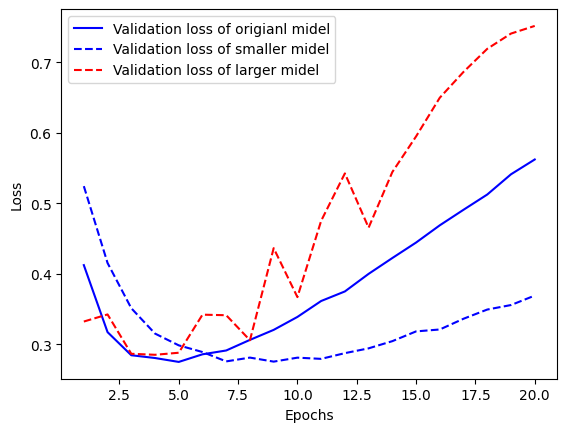

In [16]:
val_loss_original = history_original.history["val_loss"]
val_loss_smaller = history_smaller_model.history["val_loss"]
val_loss_larger = history_larger_model.history["val_loss"]

epochs = range(1, 21)
plt.plot(epochs, val_loss_original, "b-",
         label="Validation loss of origianl midel")
plt.plot(epochs, val_loss_smaller, "b--",
         label="Validation loss of smaller midel")
plt.plot(epochs, val_loss_larger, "r--",
         label="Validation loss of larger midel")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

#### Adding weight regularization

**Adding L2 weight regularization to the model**

In [17]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(16,
                 kernel_regularizer=regularizers.l2(0.002),
                 activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_l2_reg = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 57ms/step - loss: 0.6150 - accuracy: 0.7866 - val_loss: 0.4969 - val_accuracy: 0.8490
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.4169 - accuracy: 0.8889 - val_loss: 0.4094 - val_accuracy: 0.8728
Epoch 3/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3455 - accuracy: 0.9045 - val_loss: 0.3735 - val_accuracy: 0.8811
Epoch 4/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3072 - accuracy: 0.9213 - val_loss: 0.3918 - val_accuracy: 0.8699
Epoch 5/20
30/30 [==============================] - 1s 27ms/step - loss: 0.2832 - accuracy: 0.9283 - val_loss: 0.3591 - val_accuracy: 0.8878
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2693 - accuracy: 0.9351 - val_loss: 0.3650 - val_accuracy: 0.8839
Epoch 7/20
30/30 [==============================] - 1s 22ms/step - loss: 0.2546 - accuracy: 0.9401 - val_loss: 0.3670 - val_accuracy: 0.8840
Epoch 8/20
30

**Different weight regularizers available in Keras**

In [18]:
from tensorflow.keras import regularizers
regularizers.l1(0.001)
regularizers.l1_l2(l1=0.001, l2=0.001)

#### Adding dropout

**Adding dropout to the IMDB model**

In [19]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_dropout = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 3s 60ms/step - loss: 0.6308 - accuracy: 0.6396 - val_loss: 0.4966 - val_accuracy: 0.8488
Epoch 2/20
30/30 [==============================] - 1s 26ms/step - loss: 0.4963 - accuracy: 0.7769 - val_loss: 0.3868 - val_accuracy: 0.8691
Epoch 3/20
30/30 [==============================] - 1s 24ms/step - loss: 0.4053 - accuracy: 0.8390 - val_loss: 0.3390 - val_accuracy: 0.8669
Epoch 4/20
30/30 [==============================] - 1s 26ms/step - loss: 0.3494 - accuracy: 0.8697 - val_loss: 0.2869 - val_accuracy: 0.8890
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.3025 - accuracy: 0.8907 - val_loss: 0.2778 - val_accuracy: 0.8913
Epoch 6/20
30/30 [==============================] - 1s 30ms/step - loss: 0.2631 - accuracy: 0.9097 - val_loss: 0.2890 - val_accuracy: 0.8853
Epoch 7/20
30/30 [==============================] - 1s 29ms/step - loss: 0.2350 - accuracy: 0.9196 - val_loss: 0.2777 - val_accuracy: 0.8891
Epoch 8/20
30

In [20]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])
history_original = model.fit(
    train_data, train_labels,
    epochs=20, batch_size=512, validation_split=0.4)

Epoch 1/20
30/30 [==============================] - 4s 58ms/step - loss: 0.5826 - accuracy: 0.7427 - val_loss: 0.4850 - val_accuracy: 0.8568
Epoch 2/20
30/30 [==============================] - 1s 25ms/step - loss: 0.3946 - accuracy: 0.8789 - val_loss: 0.3558 - val_accuracy: 0.8766
Epoch 3/20
30/30 [==============================] - 1s 25ms/step - loss: 0.2889 - accuracy: 0.9109 - val_loss: 0.3095 - val_accuracy: 0.8850
Epoch 4/20
30/30 [==============================] - 1s 23ms/step - loss: 0.2308 - accuracy: 0.9274 - val_loss: 0.2877 - val_accuracy: 0.8875
Epoch 5/20
30/30 [==============================] - 1s 31ms/step - loss: 0.1915 - accuracy: 0.9407 - val_loss: 0.2814 - val_accuracy: 0.8886
Epoch 6/20
30/30 [==============================] - 1s 29ms/step - loss: 0.1639 - accuracy: 0.9483 - val_loss: 0.2857 - val_accuracy: 0.8876
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1411 - accuracy: 0.9579 - val_loss: 0.2892 - val_accuracy: 0.8873
Epoch 8/20
30

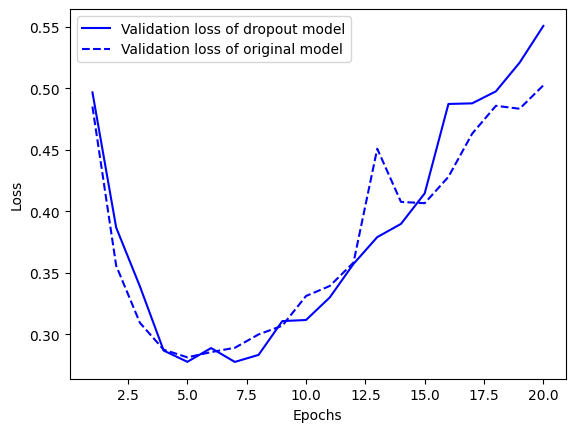

In [22]:
val_loss_dropout = history_dropout.history["val_loss"]
val_loss_original = history_original.history['val_loss']
epochs = range(1, 21)
plt.plot(epochs, val_loss_dropout, "b-",
         label="Validation loss of dropout model")
plt.plot(epochs, val_loss_original, "b--",
         label="Validation loss of original model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Summary